In [185]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np

data = pd.read_csv(r"C:\Gachon\3-1\인공지능개론\BP_data.csv",)

data

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [187]:
data.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [189]:
# Pregnancy 컬럼 NaN을 2로 채우기
data['Pregnancy'] = data['Pregnancy'].fillna(2)

# 나머지 두 컬럼은 평균값으로 채우기
columns_to_fill_mean = ['Genetic_Pedigree_Coefficient', 'alcohol_consumption_per_day']
for col in columns_to_fill_mean:
    mean_value = data[col].mean()
    data[col] = data[col].fillna(mean_value)

# 결측치 처리된 결과를 data에 다시 저장 (명시적으로 작성)
data = data.copy()


In [191]:
data.isnull().sum()

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

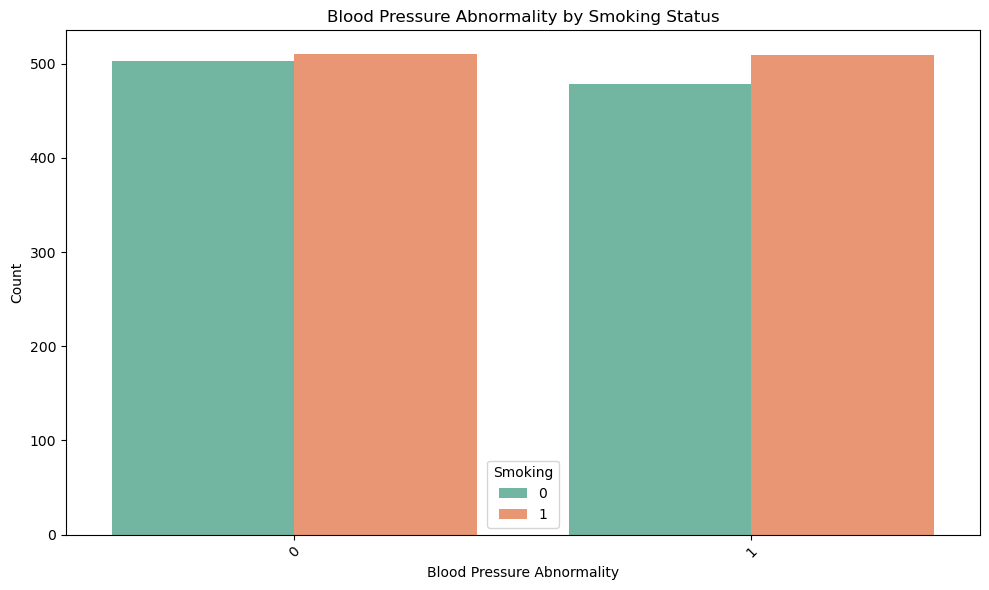

In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
  # 파일 경로 수정

# 시각화: Blood_Pressure_Abnormality를 Smoking 여부에 따라 분리해서 보기
plt.figure(figsize=(10, 6))
sns.countplot(x='Blood_Pressure_Abnormality', hue='Smoking', data=data, palette='Set2')
plt.title('Blood Pressure Abnormality by Smoking Status')
plt.xlabel('Blood Pressure Abnormality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


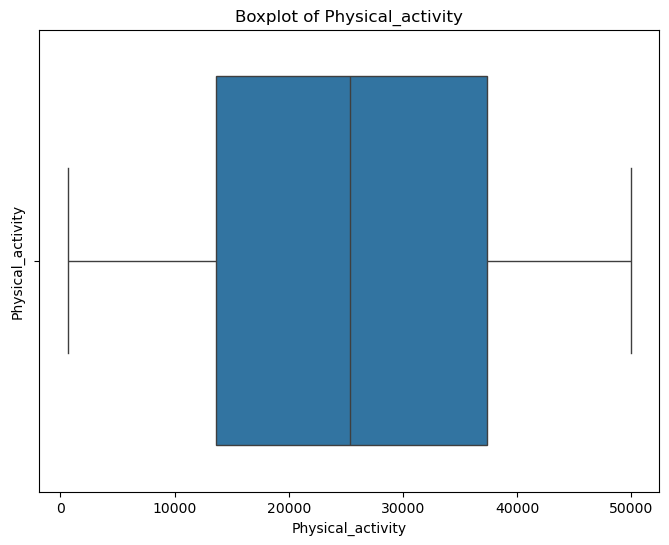

In [195]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기 (예: CSV 파일에서)
  # 파일 경로를 실제 파일명으로 바꾸세요

# 박스플롯 그리기
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Physical_activity'])
plt.title('Boxplot of Physical_activity')
plt.ylabel('Physical_activity')
plt.show()


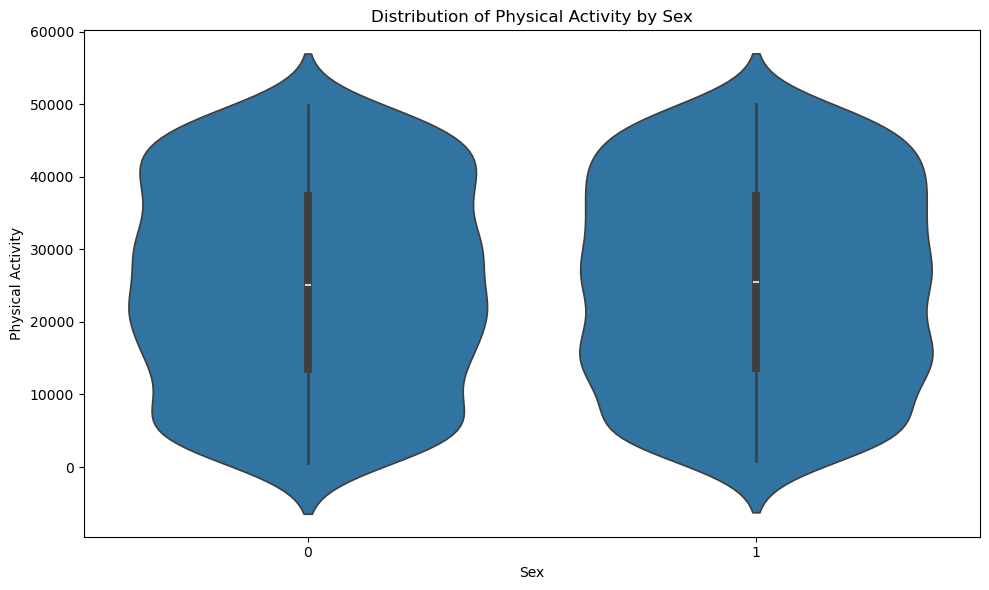

In [197]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) 데이터 불러오기




# 4) 바이올린 플롯 그리기
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='Sex',                   # 'Sex' 컬럼은 그대로
    y='Physical_activity',     # 실제 컬럼명에 맞춰 소문자 a
    data=data
)
plt.title('Distribution of Physical Activity by Sex')
plt.xlabel('Sex')
plt.ylabel('Physical Activity')
plt.tight_layout()
plt.show()


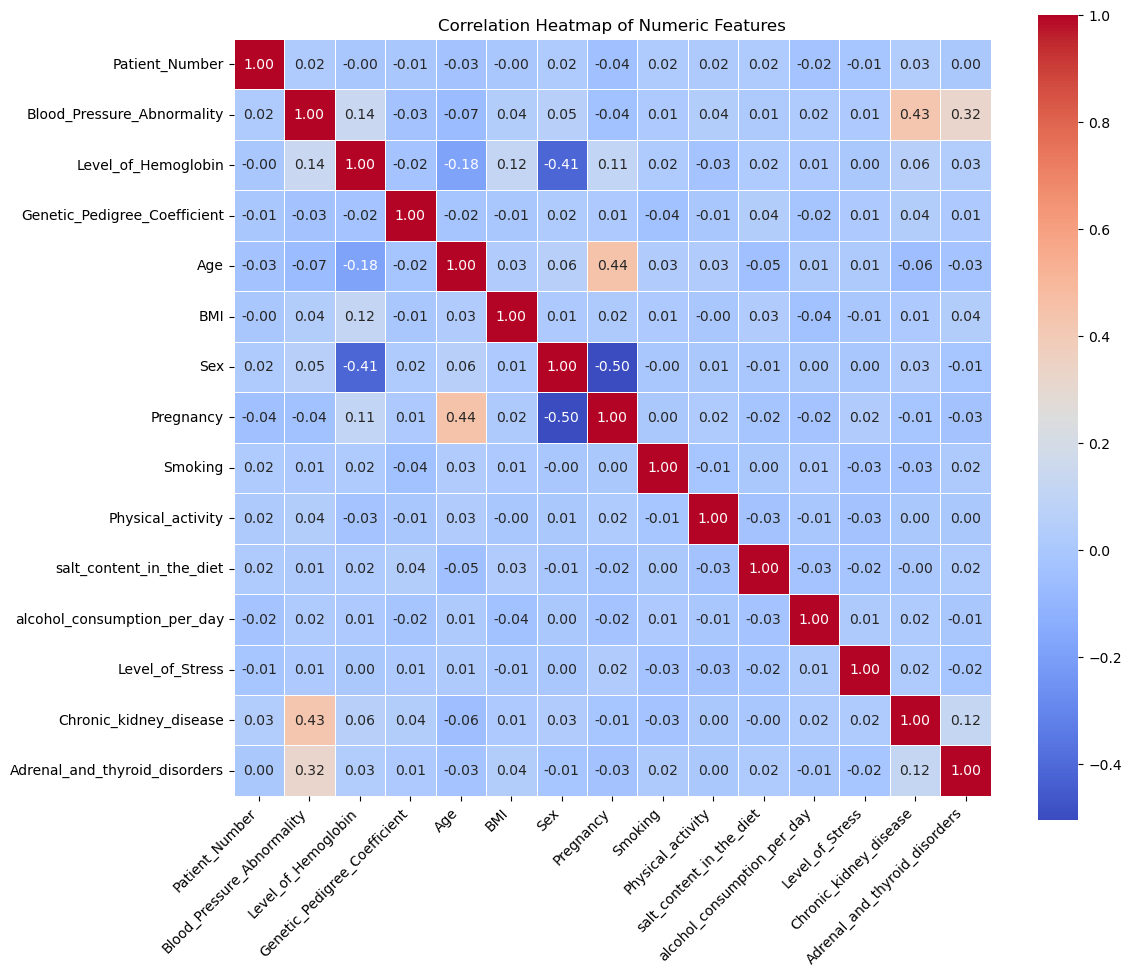

In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) 데이터 불러오기 & 컬럼명 정리
df = data
df.columns = df.columns.str.strip().str.replace(' ', '_')

# 2) 수치형 변수만 골라서 상관계수 계산
num_df = df.select_dtypes(include=['int64', 'float64'])
corr = num_df.corr()

# 3) 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,        # 셀에 상관계수 표시
    fmt='.2f',         # 소수점 둘째 자리 표기
    cmap='coolwarm',   # 컬러맵
    linewidths=0.5,    # 셀 경계 두께
    square=True        # 정사각형 셀
)
plt.title('Correlation Heatmap of Numeric Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


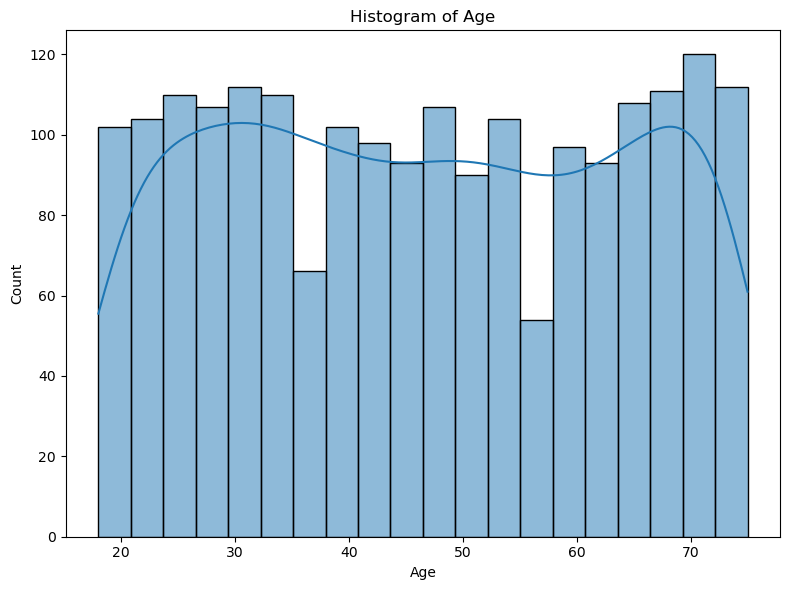

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) 데이터 불러오기 & 컬럼명 정리
df = data
df.columns = df.columns.str.strip().str.replace(' ', '_')

# 2) 히스토그램 그리기
plt.figure(figsize=(8, 6))
sns.histplot(
    data=df,
    x='Age',        # x축: Age
    bins=20,        # 막대 개수 (원하는 만큼 조정 가능)
    kde=True       # 밀도곡선 끌 수도 있음 (True로 설정)
)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')
plt.tight_layout()
plt.show()


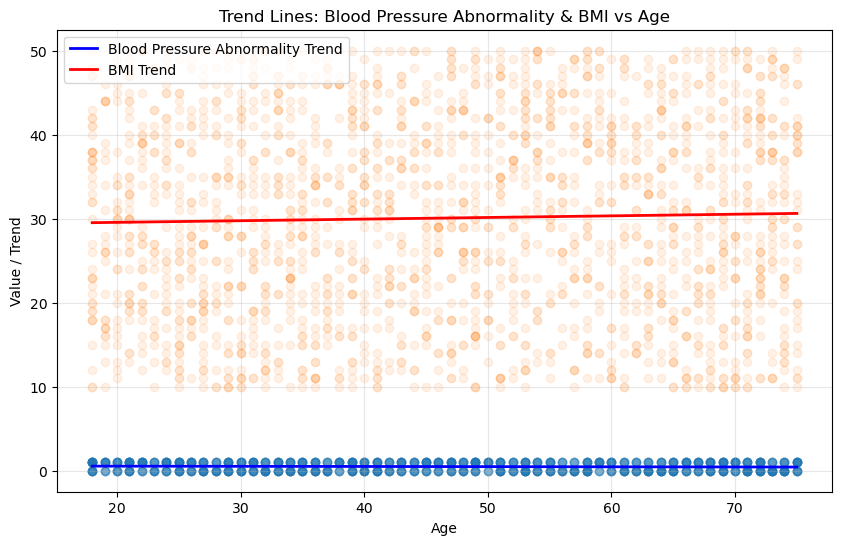

In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # numpy 추가 (회귀선 계산용)

# %matplotlib inline # 주피터 노트북/환경이 아니라면 이 줄은 필요 없을 수 있습니다.

# 1. 데이터 불러오기 & 컬럼명 정리
# 파일 경로는 사용자 환경에 맞게 수정해주세요.

try:
    df = data
    df.columns = df.columns.str.strip().str.replace(' ', '_') # 컬럼명 공백 제거 및 '_'로 변경

    # --- 결측치 및 타입 변환 처리 부분 제거 ---
    # (사용자가 이미 처리했다고 가정)
    # -------------------------------------

    # 필요한 컬럼이 있는지 확인
    required_cols = ['Age', 'BMI', 'Blood_Pressure_Abnormality']
    for col in required_cols:
        if col not in df.columns:
            raise KeyError(f"오류: CSV 파일에 '{col}' 컬럼이 없습니다. 컬럼명을 확인해주세요.")

    if df.empty:
         print("오류: CSV 파일이 비어있거나 데이터를 불러오지 못했습니다.")
    else:
        # 3. 데이터 준비 (정렬은 필수는 아님)
        # 회귀선 계산에는 정렬이 필수는 아니지만, 혹시 원본 데이터도 같이 보려면 정렬하는 것이 좋습니다.
        df_sorted = df.sort_values('Age')
        X = df_sorted['Age']
        Y1 = df_sorted['Blood_Pressure_Abnormality']
        Y2 = df_sorted['BMI']

        # 4. 선형 회귀선 계산 (직선 그래프)
        # Age vs Blood_Pressure_Abnormality
        coeffs1 = np.polyfit(X, Y1, 1) # 1차 다항식(직선) 계수 계산 [기울기, y절편]
        line1 = np.poly1d(coeffs1)     # 계수를 이용해 직선 함수 생성

        # Age vs BMI
        coeffs2 = np.polyfit(X, Y2, 1) # 1차 다항식(직선) 계수 계산 [기울기, y절편]
        line2 = np.poly1d(coeffs2)     # 계수를 이용해 직선 함수 생성

        # 5. 그래프 그리기
        plt.figure(figsize=(10, 6)) # 그래프 크기 조정 (선택 사항)

        # 원본 데이터를 희미하게 산점도로 표시 (선택 사항, 추세선만 보려면 주석 처리)
        plt.scatter(X, Y1, alpha=0.1, label='_nolegend_') # 범례에 표시 안 함
        plt.scatter(X, Y2, alpha=0.1, label='_nolegend_') # 범례에 표시 안 함

        # 계산된 직선(추세선) 그리기
        plt.plot(X, line1(X), label="Blood Pressure Abnormality Trend", color="blue", linewidth=2)
        plt.plot(X, line2(X), label="BMI Trend", color="red", linewidth=2)

        # 그래프 설정
        plt.xlabel("Age")
        plt.ylabel("Value / Trend") # Y축 레이블 변경
        plt.title("Trend Lines: Blood Pressure Abnormality & BMI vs Age") # 제목 변경
        plt.legend(loc="best") # 범례 위치 자동 조절
        plt.grid(alpha=0.3) # 그리드 투명도 약간 높임
        plt.show()

except FileNotFoundError:
    print(f"오류: 파일 '{file_path}'를 찾을 수 없습니다. 파일 경로를 확인해주세요.")
except KeyError as e:
    print(e) # 컬럼 누락 오류 메시지 출력
except Exception as e:
    # 데이터 자체의 문제 (예: 숫자가 아닌 값이 포함됨)로 인해 polyfit 등에서 오류가 발생할 수 있음
    print(f"데이터 처리 또는 그래프 생성 중 오류 발생: {e}")
    print("데이터에 숫자형이 아닌 값이 포함되어 있거나 다른 문제가 있는지 확인해주세요.")

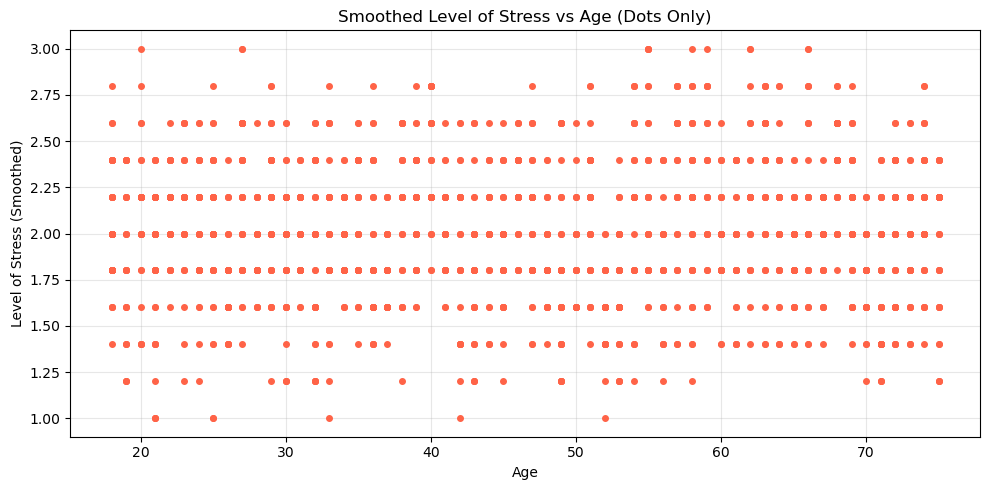

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 불러오기 및 컬럼 정리
df = data
df.columns = df.columns.str.strip().str.replace(' ', '_')

# 나이순 정렬
df_sorted = df.sort_values('Age')

# 이동 평균 계산 (window=5)
df_sorted['Stress_Smooth'] = df_sorted['Level_of_Stress'].rolling(window=5, center=True).mean()

# 점선(마커)만 찍기
plt.figure(figsize=(10, 5))
plt.plot(df_sorted['Age'], df_sorted['Stress_Smooth'], linestyle='None', marker='o', color='tomato', markersize=4)

plt.xlabel("Age")
plt.ylabel("Level of Stress (Smoothed)")
plt.title("Smoothed Level of Stress vs Age (Dots Only)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [207]:
# 데이터와 타겟 분리
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X = data.drop('Blood_Pressure_Abnormality', axis=1).values
y = data['Blood_Pressure_Abnormality'].values
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape,

((1600, 14), (400, 14), (1600,), (400,))

In [209]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)
# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)
X_train.shape, X_test.shape, y_train.shape, y_test.shape




(torch.Size([1600, 14]),
 torch.Size([400, 14]),
 torch.Size([1600]),
 torch.Size([400]))

In [211]:
class DiabetesDense(nn.Module):
    def __init__(self):
        super(DiabetesDense, self).__init__()
        self.fc1 = nn.Linear(14, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 2)  # 2 classes in the dataset
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = DiabetesDense()



In [213]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



In [215]:
# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/20, Loss: 0.6550, Accuracy: 73.00%
Epoch 2/20, Loss: 0.5530, Accuracy: 72.00%
Epoch 3/20, Loss: 0.5085, Accuracy: 76.00%
Epoch 4/20, Loss: 0.4755, Accuracy: 80.00%
Epoch 5/20, Loss: 0.4498, Accuracy: 81.00%
Epoch 6/20, Loss: 0.4092, Accuracy: 83.50%
Epoch 7/20, Loss: 0.3782, Accuracy: 84.75%
Epoch 8/20, Loss: 0.3470, Accuracy: 86.50%
Epoch 9/20, Loss: 0.3256, Accuracy: 87.50%
Epoch 10/20, Loss: 0.3099, Accuracy: 87.25%
Epoch 11/20, Loss: 0.3000, Accuracy: 87.75%
Epoch 12/20, Loss: 0.2884, Accuracy: 88.25%
Epoch 13/20, Loss: 0.2803, Accuracy: 88.00%
Epoch 14/20, Loss: 0.2734, Accuracy: 87.25%
Epoch 15/20, Loss: 0.2687, Accuracy: 88.00%
Epoch 16/20, Loss: 0.2634, Accuracy: 88.25%
Epoch 17/20, Loss: 0.2580, Accuracy: 87.50%
Epoch 18/20, Loss: 0.2535, Accuracy: 89.00%
Epoch 19/20, Loss: 0.2469, Accuracy: 88.50%
Epoch 20/20, Loss: 0.2433, Accuracy: 88.75%
Training complete.


In [217]:
# Evaluation
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# Calculate specificity for each class
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Confusion Matrix:
[[186  22]
 [ 23 169]]
F1 Score: 0.89
Precision: 0.89
Recall: 0.89
Specificity: 0.89


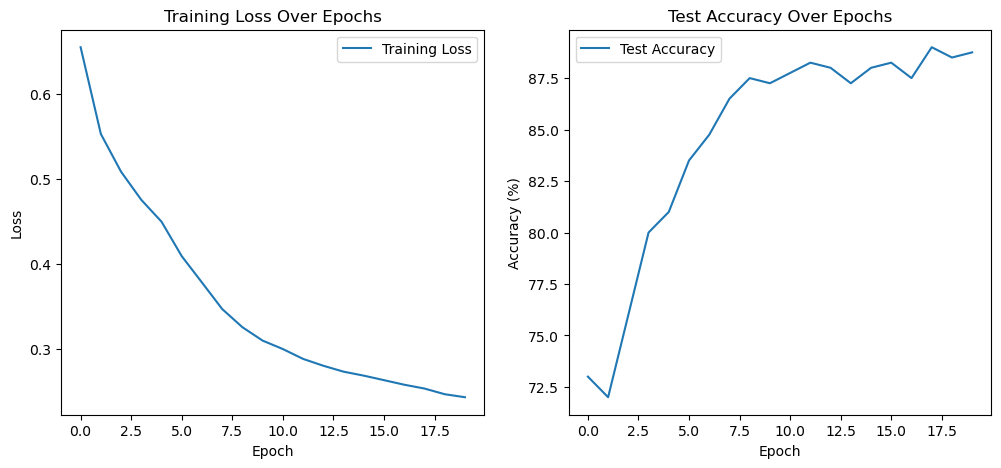

In [221]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()